<a href="https://colab.research.google.com/github/endar1y12/Pengolahan-Citra-Digital/blob/main/Responsi_kelompok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RESPONSI KELOMPOK**
Anggota Kelompok :
* Yulanda - 5210411142
* Rizky Fauzi - 5210411162
* Daryanti - 5210411176



#Gambar

In [ ]:
from google.colab import drive # untuk menghubungkan google colab dengan drive
drive.mount('/content/drive') # lokasi penempatan drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


shape img (2583, 2939, 3)
shape img_g (2583, 2939)


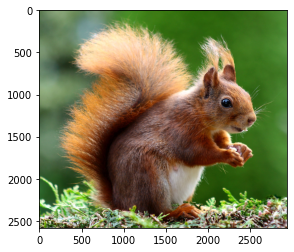

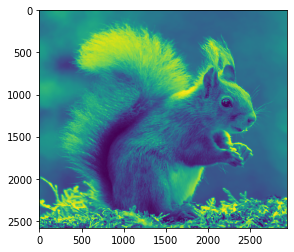

In [ ]:

from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# foto minimal 500 x 500 pixel
img = plt.imread("/content/drive/MyDrive/PCD/pexels-pixabay-47547.jpg")
img_g = rgb2gray(img)

plt.figure()
plt.imshow(img)
print("shape img",img.shape)

plt.figure()
plt.imshow(img_g)
print('shape img_g',img_g.shape) #shape gambar grayscale


0.43707282315345103
(2583, 2939)


<Figure size 432x288 with 0 Axes>

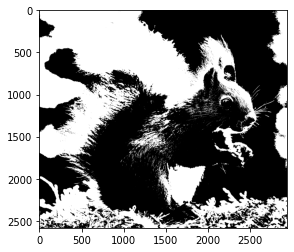

In [ ]:
import numpy as np
from skimage.filters import threshold_mean

#membuat gambar grayscale menjadi biner
def binerisasi(img,threshold) : # untuk menentukan titik tengah dari gambar kemudian dibuah menjadi biner
  img_q = np.zeros((img.shape[0],img.shape[1]))
  for r in range(0,img.shape[0]):
    for c in range (0,img.shape[1]):
      if img[r,c] < threshold:
        img_q[r,c]= 0
      else:
        img_q[r,c] = 255

  return img_q

#thresohld pakai library

plt.figure( )
threshold = threshold_mean(img_g)
print(threshold)
img_biner =binerisasi(img_g,threshold)
plt.figure()
plt.imshow(img_biner,cmap=plt.cm.gray)
print(img_biner.shape) # shape gambar biner

# 1. Hapus background

#erosi
Operasi ini mempersempit (memperkecil) objek latar depan.


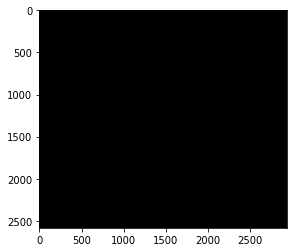

In [ ]:
import math
import cv2


def erosi(img,struc):
#jumlah padding
  pad_size = math.floor(struc.shape[0]/2)
#buat gambar baru
  img_padd = np.zeros((img.shape[0]+2*pad_size,img.shape[1]+2*pad_size))
#gambar lama masuk kedalam gambar ke padding
  for r in range(img.shape[0]):
    for c in range (img.shape[1]):
      img_padd[r+pad_size,c+pad_size] = img[r,c]
#apply erosi
  img_akhir = np.zeros((img.shape[0],img.shape[1]))
  for r in range(img_akhir.shape[0]):
     for c in range (img_akhir.shape[1]):
       for i in range(struc.shape[0]):
         for j in range (struc.shape[1]):
           img_akhir[r,c] +=struc[i,j]*img_padd[r+i,c+j]
       if img_akhir[r,c] == struc.shape[0]*struc.shape[1]:
          img_akhir[r,c] = 1
       else:
          img_akhir[r,c] = 0

        #######
        #jika hit/miss -> 0
        #jika fit -> 1
        #######
  return img_akhir

#structure element yg digunakan
struc_elem = np.ones([3,3])


img_erosi = erosi(img_biner,struc_elem)

plt.imshow(img_erosi,cmap= plt.cm.gray)

#dilasi
Operasi ini memperluas (memperbesar) objek latar depan.


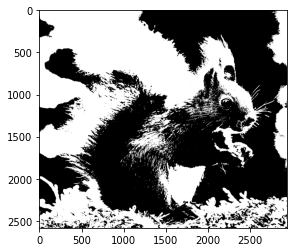

In [ ]:
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt



def dilasi(img,struc):
#jumlah padding
  pad_size = math.floor(struc.shape[0]/2)
#buat gambar baru
  img_padd = np.zeros((img.shape[0]+2*pad_size,img.shape[1]+2*pad_size))
#gambar lama masuk kedalam gambar ke padding
  for r in range(img.shape[0]):
    for c in range (img.shape[1]):
      img_padd[r+pad_size,c+pad_size] = img[r,c]
#apply dilasi
  img_akhir = np.zeros((img.shape[0],img.shape[1]))
  for r in range(img_akhir.shape[0]):
     for c in range (img_akhir.shape[1]):
       for i in range(struc.shape[0]):
         for j in range (struc.shape[1]):
           img_akhir[r,c] +=struc[i,j]*img_padd[r+i,c+j]
       if img_akhir[r,c] > 0:
          img_akhir[r,c] = 1
       else:
          img_akhir[r,c] = 0

        #######
        #jika miss -> 0
        #jika fit/hit -> 1
        #######
  return img_akhir

#structure element yg digunakan
struc_elem = np.ones([3,3])


img_dilasi  = dilasi(img_biner,struc_elem)
plt.imshow(img_dilasi,cmap= plt.cm.gray)

#opening
pembukaan membuang objek kecil pada latar depan citra.



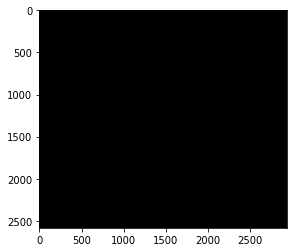

In [ ]:
def opening(img,struc):
  return dilasi(erosi(img,struc),struc) #

struc_elem = np.ones([3,3])
img_op = opening(img_biner,struc_elem)

plt.imshow(img_op,cmap=plt.cm.gray)

#closing
penutupan membuang lubang kecil pada latar depan citra.

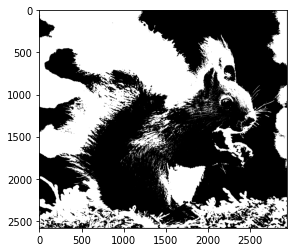

In [ ]:
def closing(img,struc):
  return erosi(dilasi(img,struc),struc)

struc_elem = np.ones([3,3])
img_cl = closing(img_biner,struc_elem)

plt.imshow(img_cl,cmap=plt.cm.gray)

#2.Masking

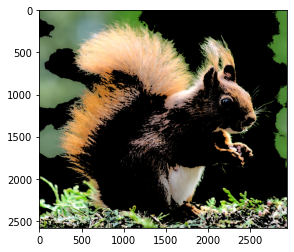

(2583, 2939, 3)


In [ ]:
#Masking pada citra asli menggunakan operasi bitwise AND dan image_mask yang sudah diubah menjadi RGB:

import cv2
from matplotlib import pyplot as plt
import numpy as np

# Membaca citra asli dan citra masking
image_original = img
image_mask = img_cl

#Mengubah ukuran salah-satu citra agar sama
image_original = cv2.resize(image_original, (image_mask.shape[1], image_mask.shape[0]))

#Mengubah tipe data agar sesuai dengan operasi bitwise AND
image_original = image_original.astype(np.uint8)
image_mask = image_mask.astype(np.uint8)


# Mengubah image_mask menjadi RGB dengan membuat duplikat dari setiap channel
image_mask_rgb = np.repeat(image_mask[:,:,np.newaxis], 3, axis=2)

# Menerapkan masking dengan operasi bitwise AND
result = cv2.bitwise_and(image_original, image_original, mask=image_mask)

# Menampilkan hasil
plt.imshow(result)
plt.show()
print(result.shape)

# 3. Cropping

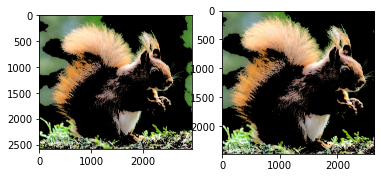

In [ ]:
#untuk melakukan crop pada gambar sesuai dengan kebutuhan
def cropping(img,xL_diff,xR_diff,yB_diff,yT_diff):
  xL = xL_diff
  xR = img.shape[1] - xR_diff
  yB = yB_diff
  yT = img.shape[0] - yB_diff
  return img[yB:yT,xL:xR]

imgnew = cropping(result,100,200,50,300)
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(result,cmap=plt.cm.gray)
ax2.imshow(imgnew,cmap=plt.cm.gray)

#4. Filtering high-pass

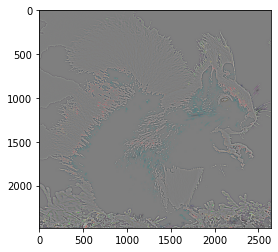

In [ ]:
import cv2
import numpy

# high-pass filtering metode GAUSSIAN HIGHPASS
blur = cv2.GaussianBlur(imgnew,(31,31),0)
filtered = imgnew - blur
filtered = filtered + 127*numpy.ones(filtered.shape, numpy.uint8)

plt.figure()
plt.imshow(filtered)

#5. Watermark

<ipython-input-61-b66567dfdc63>:7: FutureWarning: Pass-through of possibly RGB images in gray2rgb is deprecated. In version 0.19, input arrays will always be considered grayscale, even if the last dimension has length 3 or 4. To prevent this warning and ensure compatibility with future versions, detect RGB images outside of this function.
  img_akhir = gray2rgb(filtered)


[[[126 127 126]
  [128 129 129]
  [129 128 126]
  ...
  [127 127 127]
  [127 127 127]
  [127 127 127]]

 [[127 127 127]
  [127 127 127]
  [127 127 127]
  ...
  [127 127 127]
  [127 127 127]
  [127 127 127]]

 [[125 127 127]
  [127 127 127]
  [127 127 127]
  ...
  [127 127 127]
  [127 127 127]
  [127 127 127]]

 ...

 [[ 35   6  41]
  [180 169 152]
  [186 181 166]
  ...
  [213 213 210]
  [207 203 204]
  [200 196 199]]

 [[ 33   4  40]
  [ 34   5  40]
  [ 34   5  40]
  ...
  [211 209 211]
  [205 203 205]
  [203 199 204]]

 [[ 33   4  39]
  [ 33   4  39]
  [ 34   4  39]
  ...
  [209 211 215]
  [212 214 218]
  [217 218 225]]]
shape gambar :  (2483, 2639, 3)


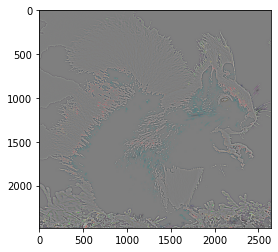

In [ ]:
from skimage.color.colorlabel import gray2rgb
import cv2
import numpy as np

from skimage.color import rgb2gray
# img_akhir = cv2.cvtColor(imgnew,cv2.COLOR_GRAY2RGB)
img_akhir = gray2rgb(filtered)
plt.figure()
plt.imshow(img_akhir)



def text_to_binary(text): #untuk mengubah text ke biner
  binary= ""
  for tx in text: #mengambil setiap huruf dari pesan yang disembunyikan
    binary += format(ord(tx),'08b')#mengubah ke dalam asc
  return binary

def input_message(img,binary_message): # untuk menginputkan pesan pada gambar yang diinput
  flat_img = img.flatten() #membuat gambar 2D menjadi flat agar mempermudah index nya
  for i in range(len(binary_message)):
    binary_pixel = list(format(flat_img[i],'08b'))  #pixel ini biner nya apa
    binary_pixel[-1] = binary_message[i] #biner yang paling belakang (-1)
    flat_img[i]=int(''.join(binary_pixel),2)#mengubah biner ke desimal -flat img lama disisipi flat img baru
  return flat_img.reshape(img.shape) #mengubah flat (1) menjadi bentuk asal

binary = text_to_binary('Nama Anggota Kelompok : 1. Yulanda - 5210411142 2. Rizky Fauzi - 5210411162 3. Daryanti - 5210411176  ')
enc_img = input_message(img_akhir,binary)
print(enc_img)

print("shape gambar : ",img_akhir.shape)

#6. Encoding

In [ ]:
def binary_to_text(binary_text): #mengubah biner menjadi text
  bin_list = [binary_text[a:a+8] for a in range(0,len(binary_text),8)]
  text = ""
  for binary in bin_list:
    text += chr(int(binary,2))
  return text

def extract_lsb(enc_img): #mengekstrak gambar yang ada watermark
  flat_img = enc_img.flatten()
  lsb = ""
  for pix in flat_img:
    lsb += list(format(pix,'08b'))[-1]
  return lsb

lsb = extract_lsb(enc_img)
binary_to_text(lsb)

'Nama Anggota Kelompok : 1. Yulanda - 5210411142 2. Rizky Fauzi - 5210411162 3. Daryanti - 5210411176  \x1c\x03À7ößÚHL\x80µ\x9b{i\x07âÛä\x92I6ß²Id#-\xad\x0bm#ÿÀ\x96ÐM¶I ÿô\x00óÿ°ÛôÝOÛi$\x9fþÛbI¶ÂI$\x92\x9cÆÆØL\x82\x17ùäìa.4\x16&¤i\t$\x92\x10#m°\x02m´¯ü\x00\x00ÿòNà\x0fÿÿûm¶ßÀ\x02DÛ|\x00\x00\x01»m$\x8fÿúBjIm°\x00\r°5\x96G\x06ÒK\x7fm\x8e1\x90\x01Ã\x7fÀOþÚ)\x7fµ¶FÝ¨\r\x89$«gûv\x94R\x12\'ÿÀ\x05\x92d\x87ä\x90$\x92\x92NÜ\rµ¶MÿÀ\x0f\x94 \x01k[\x12®pÞ\x84Kÿðÿb\x12\x7fí¹ \x00\t$\x94\x92³oô_ý\x93\x90\x9d³\x92RþÙT\x92µ²é"@\x7fÇòU%ûÿí\'ù$\x93mµ9ÿ_\x82[é&É-¡\x00íºNÄ\x0cIÛ\x1c\x06Åð\x01ªFßÿñ\'æô¿òGÿÿù$m¹6Ø¿ý\x7fý¿\x00m¶Ù\'ñ\x88\x00?\x18ÕÒ<PC,Ù\x98ÅmÀ>\x05S\x81±\x8abFoÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿ